**This notebook demonstrats various ways of doing velocity gradient and their comparison.**

In [1]:
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel, gaussian_filter

## Example 1 -- skip size = 8 px (120 m)

In [2]:
df = pd.read_csv('../results_agu21.csv', dtype=str)
## Example results
demo = df.loc[41]
print(demo)

Date                                           LS8-20180304-20180405
Chip (px)                                                         64
Resolution (px)                                                    8
Prefilter                                                       NAOF
Subpixel                                                       pyrUP
Software                                                    autoRIFT
Vx                 /home/jovyan/Projects/PX_comparison/PX/autoRIF...
Vy                 /home/jovyan/Projects/PX_comparison/PX/autoRIF...
OIE-x                                                      0.1171875
OIE-y                                                    0.205078125
SS-x                                                       0.6159315
SS-y                                                      0.77401435
Name: 41, dtype: object


In [3]:
with rasterio.open(demo.Vx) as srcx, rasterio.open(demo.Vy) as srcy:
    vx_full = srcx.read(1)
    vy_full = srcy.read(1)
    
nonNaN_pts_idx = np.logical_and(vx_full > -9998, vy_full > -9998)
vx_full[~nonNaN_pts_idx] = np.nan  # replace NaN points with np.nan
vy_full[~nonNaN_pts_idx] = np.nan  # replace NaN points with np.nan

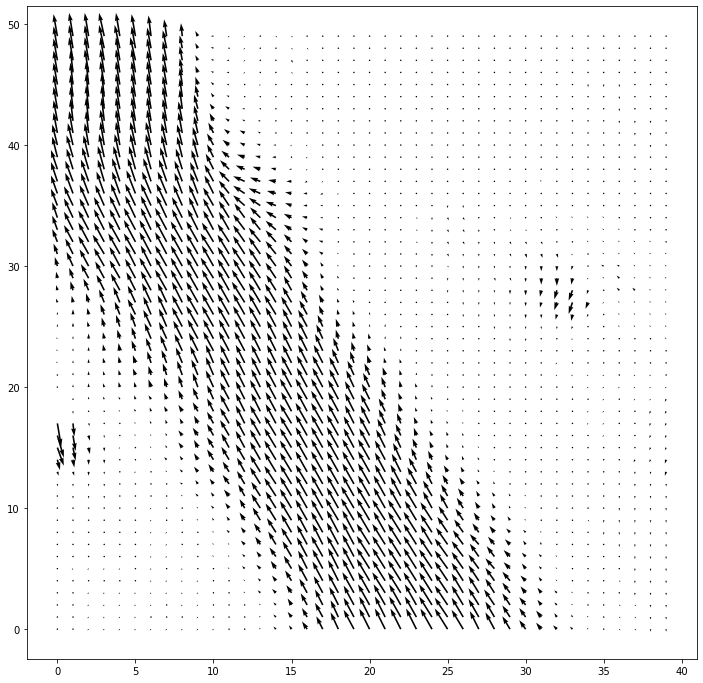

In [4]:
# Example velocity field (glacier channel, off-ice area, noise patches, and no-data value)
fig, axtmp = plt.subplots(1, 1, figsize=(12, 12))
axtmp.quiver(np.flipud(vx_full[250:300, 285:325]), np.flipud(vy_full[250:300, 285:325]))
# plt.quiver(vx_full[100:150, 200:250], vy_full[100:150, 200:250])

### Three different ways of getting $\frac{\partial V_x}{\partial x}$

In [5]:
a = sobel(vx_full, axis=1, mode='constant')
b = np.gradient(vx_full, axis=1)
c = gaussian_filter(b, 0.6)

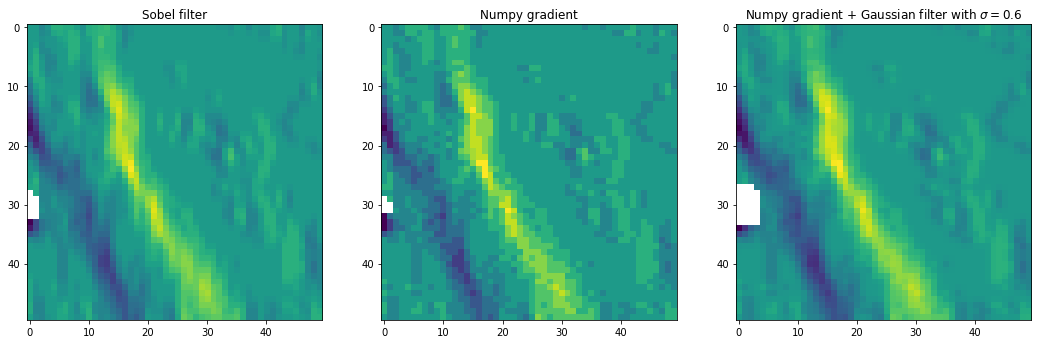

In [6]:
fig, ax1 = plt.subplots(1, 3, figsize=(18, 6))
ax1[0].imshow(a[250:300, 285:335])
ax1[0].set_title('Sobel filter')
ax1[1].imshow(b[250:300, 285:335])
ax1[1].set_title('Numpy gradient')
ax1[2].imshow(c[250:300, 285:335])
ax1[2].set_title('Numpy gradient + Gaussian filter with $\sigma = 0.6$');

### Three different ways of getting $\epsilon_{xy}$

In [7]:
# =========== Note: this is to correct a reversed Sobel filter along the y direction.
vy_full = np.flipud(vy_full)
vx_full = np.flipud(vx_full)
# ===========
duydx_a = sobel(vy_full, axis=1, mode='constant')
duxdy_a = sobel(vx_full, axis=0, mode='constant')
duydx_b = np.gradient(vy_full, axis=1)
duxdy_b = np.gradient(vx_full, axis=0)
# =========== transfer back to image axis
duydx_a = np.flipud(duydx_a)
duxdy_a = np.flipud(duxdy_a)
duydx_b = np.flipud(duydx_b)
duxdy_b = np.flipud(duxdy_b)

exy_a = 0.5 * (duxdy_a + duydx_a)
exy_b = 0.5 * (duxdy_b + duydx_b)
exy_c = gaussian_filter(exy_b, 0.6)

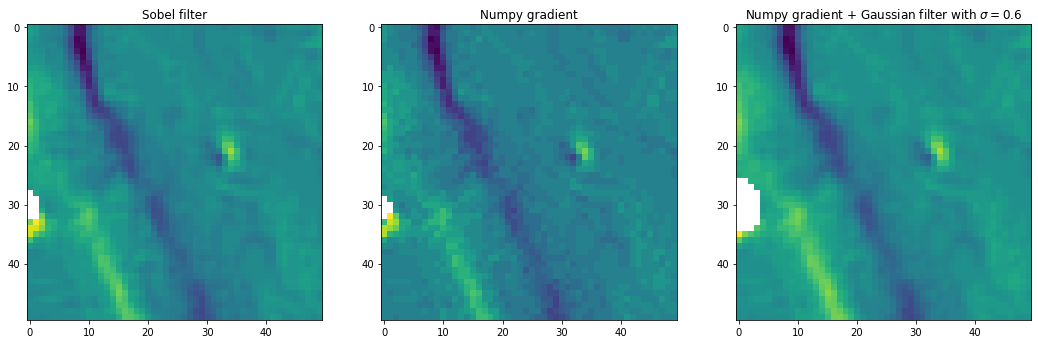

In [8]:
fig, ax2 = plt.subplots(1, 3, figsize=(18, 6))
ax2[0].imshow(exy_a[250:300, 285:335])
ax2[0].set_title('Sobel filter')
ax2[1].imshow(exy_b[250:300, 285:335])
ax2[1].set_title('Numpy gradient')
ax2[2].imshow(exy_c[250:300, 285:335])
ax2[2].set_title('Numpy gradient + Gaussian filter with $\sigma = 0.6$');

## Example 2 -- original resolution (15 m)

In [9]:
## 2nd Example results
demo = df.loc[25]
print(demo)

Date                                           LS8-20180304-20180405
Chip (px)                                                         65
Resolution (px)                                                    1
Prefilter                                                        Gau
Subpixel                                                   parabolic
Software                                                        Vmap
Vx                 /home/jovyan/Projects/PX_comparison/PX/Vmap/pa...
Vy                 /home/jovyan/Projects/PX_comparison/PX/Vmap/pa...
OIE-x                                            0.15759776532649994
OIE-y                                            0.17998206615447998
SS-x                                                       0.3948701
SS-y                                                      0.33154497
Name: 25, dtype: object


In [10]:
with rasterio.open(demo.Vx) as srcx, rasterio.open(demo.Vy) as srcy:
    vx_full = srcx.read(1)
    vy_full = srcy.read(1)
    
nonNaN_pts_idx = np.logical_and(vx_full > -9998, vy_full > -9998)
vx_full[~nonNaN_pts_idx] = np.nan  # replace NaN points with np.nan
vy_full[~nonNaN_pts_idx] = np.nan  # replace NaN points with np.nan

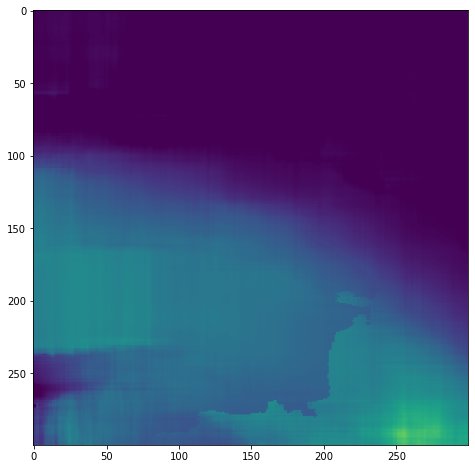

In [11]:
fig, axtmp = plt.subplots(1, 1, figsize=(12, 8))
sob = axtmp.imshow(vx_full[950:1250, 1500:1800], vmin=0, vmax=1)
# fig.colorbar(sob, ax=axtmp)

### Three different ways of getting $\frac{\partial V_x}{\partial x}$

In [12]:
a = sobel(vx_full, axis=1, mode='constant')
b = np.gradient(vx_full, axis=1)
c = gaussian_filter(b, 0.6)

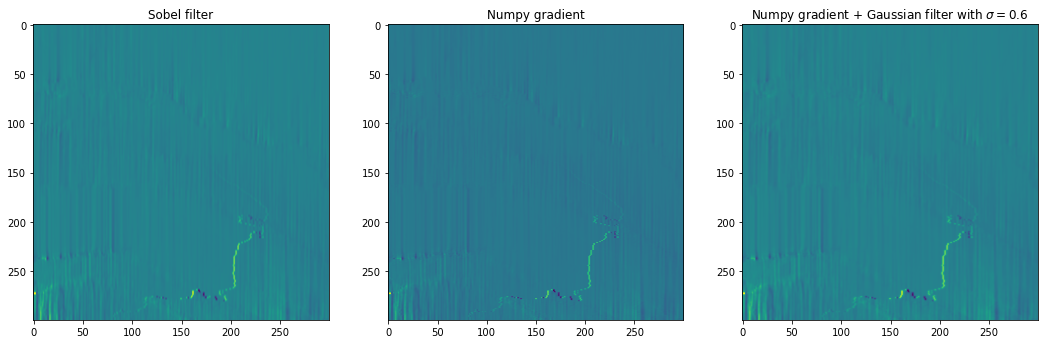

In [13]:
fig, ax1 = plt.subplots(1, 3, figsize=(18, 6))
ax1[0].imshow(a[950:1250, 1500:1800])
ax1[0].set_title('Sobel filter')
ax1[1].imshow(b[950:1250, 1500:1800])
ax1[1].set_title('Numpy gradient')
ax1[2].imshow(c[950:1250, 1500:1800])
ax1[2].set_title('Numpy gradient + Gaussian filter with $\sigma = 0.6$');

### Three different ways of getting $\epsilon_{xy}$

In [14]:
# =========== Note: this is to correct a reversed Sobel filter along the y direction.
vy_full = np.flipud(vy_full)
vx_full = np.flipud(vx_full)
# ===========
duydx_a = sobel(vy_full, axis=1, mode='constant')
duxdy_a = sobel(vx_full, axis=0, mode='constant')
duydx_b = np.gradient(vy_full, axis=1)
duxdy_b = np.gradient(vx_full, axis=0)
# =========== transfer back to image axis
duydx_a = np.flipud(duydx_a)
duxdy_a = np.flipud(duxdy_a)
duydx_b = np.flipud(duydx_b)
duxdy_b = np.flipud(duxdy_b)

exy_a = 0.5 * (duxdy_a + duydx_a)
exy_b = 0.5 * (duxdy_b + duydx_b)
exy_c = gaussian_filter(exy_b, 0.6)

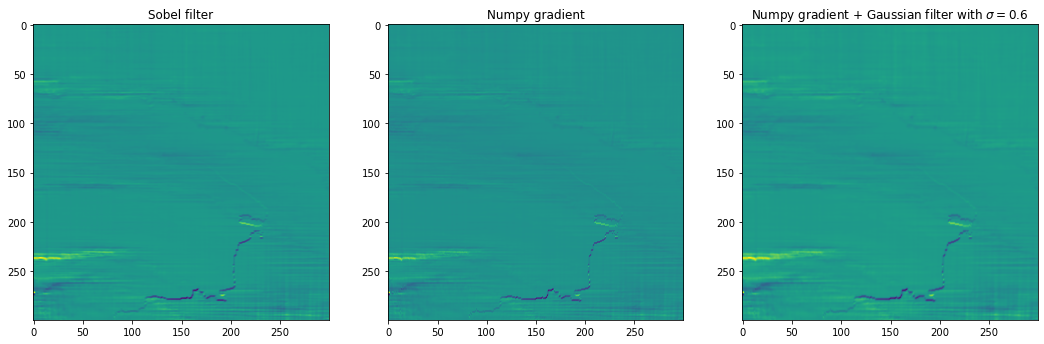

In [15]:
fig, ax2 = plt.subplots(1, 3, figsize=(18, 6))
ax2[0].imshow(exy_a[950:1250, 1500:1800])
ax2[0].set_title('Sobel filter')
ax2[1].imshow(exy_b[950:1250, 1500:1800])
ax2[1].set_title('Numpy gradient')
ax2[2].imshow(exy_c[950:1250, 1500:1800])
ax2[2].set_title('Numpy gradient + Gaussian filter with $\sigma = 0.6$');